### Clustering

for math -> 
-AndrewNG
-Coordinate Descent

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [3]:
k = 5

In [4]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = k,random_state = 3)

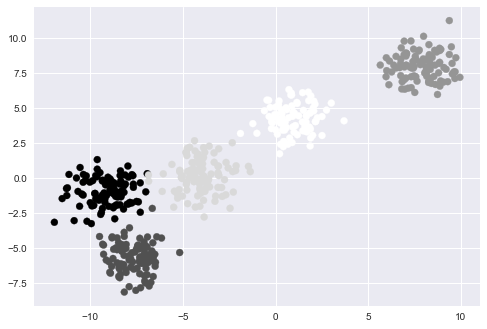

In [5]:
plt.style.use('seaborn')
plt.scatter(X[:,0],X[:,1],c = y)

In [452]:
def distance(x1,x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return np.sqrt(np.sum((x1-x2)**2))

In [453]:
#checkDistance
x1 = (2,3)
x2 = [3,4]
distance(x1,x2)

1.4142135623730951

In [454]:
def initializeClusters(k):
    clusters = []
    colors = ["Red","Blue","Green","Orange","Violet"]
    points = []
    for kx in range(k):
        center = 20*(np.random.random(X.shape[1])-0.5) 
        cluster = {
                "Center" : center,
                "Points" : points,
                "Color" : colors[kx]
            }
        clusters.append(cluster)
    return clusters

In [455]:
#check
clusters = initializeClusters(k)
print(clusters)
print(type(clusters[0]))

[{'Center': array([ 7.35388087, -7.06744105]), 'Points': [], 'Color': 'Red'}, {'Center': array([-0.11243507, -4.60340853]), 'Points': [], 'Color': 'Blue'}, {'Center': array([1.63075621, 2.43582587]), 'Points': [], 'Color': 'Green'}, {'Center': array([-5.88159333, -9.58039605]), 'Points': [], 'Color': 'Orange'}, {'Center': array([1.14706021, 4.32288995]), 'Points': [], 'Color': 'Violet'}]
<class 'dict'>


In [464]:
def assignClusterCenter(X):    #E-step
    for kx in range(k):
        clusters[kx]['Points'] = []
    for i in range(X.shape[0]):
        dist = []
        for kx in range(k):
            d = distance(X[i],clusters[kx]['Center'])
            dist.append(d)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['Points'].append((X[i]))
    return clusters

In [457]:
#check
clusters = assignClusterCenter(X)
print(np.shape(clusters[4]['Points']))

(192, 2)


In [465]:
def plotClusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['Points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],color = clusters[kx]['Color'])
        except:
            pass
        plt.scatter(clusters[kx]["Center"][0],clusters[kx]["Center"][1],marker = '*',color = 'black')
    plt.show()

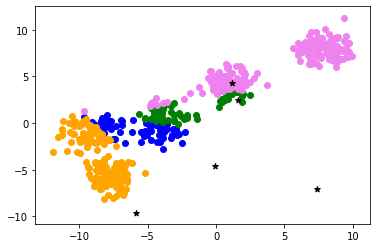

In [462]:
#check
plotClusters(clusters)   

In [463]:
def updateClusters(clusters):    #M-step
    for kx in range(k):
        s = np.shape(clusters[kx]['Points'])
        if s[0] > 0:
            pts = np.array(clusters[kx]['Points'])
            new_center = pts.mean(axis = 0)
            clusters[kx]['Center'] = new_center
    return clusters

In [514]:
#def formClusters(X,num_itr):         #defining function terminated randomness
clusters = initializeClusters(k)

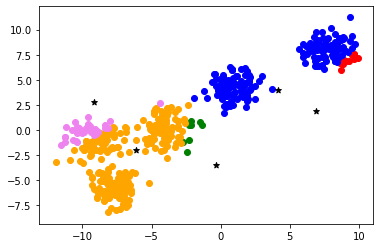

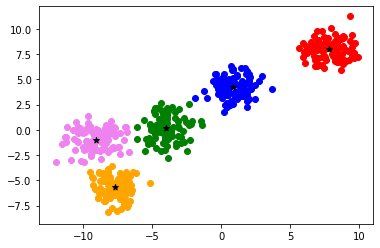

In [515]:
clusters = assignClusterCenter(X)
plotClusters(clusters)  
for itr in range(20):
    clusters = assignClusterCenter(X)
    clusters = updateClusters(clusters)
plotClusters(clusters)      

#### Using Scikit library for better initialisation

In [521]:
from sklearn.cluster import KMeans

In [535]:
clusters = KMeans(n_clusters = 5)

In [538]:
clusters.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [539]:
center = clusters.cluster_centers_
print(type(clusters.cluster_centers_))

<class 'numpy.ndarray'>


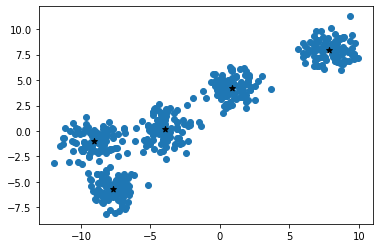

In [540]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(center[:,0],center[:,1],color = 'black',marker = '*')

In [541]:
pred = clusters.labels_

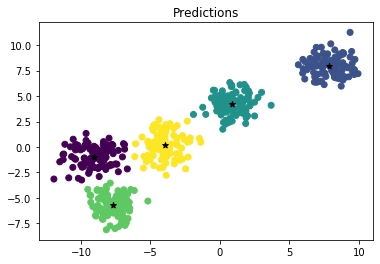

In [543]:
plt.title("Predictions")
plt.scatter(X[:,0],X[:,1],c = pred)
plt.scatter(center[:,0],center[:,1],color = 'black',marker = '*')

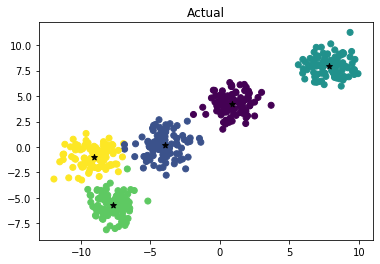

In [544]:
plt.title("Actual")
plt.scatter(X[:,0],X[:,1],c = y)
plt.scatter(center[:,0],center[:,1],color = 'black',marker = '*')

### Clustering for non-linearly seperable data

In [545]:
from sklearn.datasets import make_moons

In [556]:
X,y = make_moons(n_samples = 200,noise = 0.1)       #Noise = 2 karke clustering....

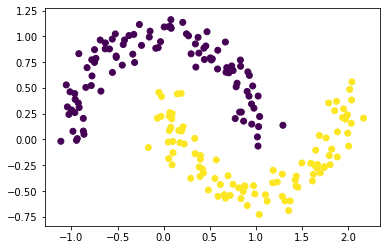

In [557]:
plt.scatter(X[:,0],X[:,1],c = y)

#### KMeans

In [558]:
from sklearn.cluster import KMeans

In [560]:
km = KMeans(n_clusters = 2)

In [564]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [570]:
pred = km.labels_
center = km.cluster_centers_

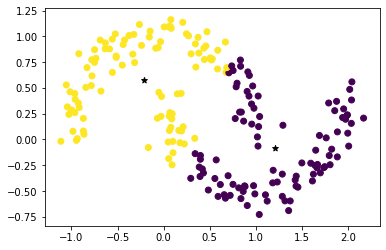

In [571]:
plt.scatter(X[:,0],X[:,1],c = pred)
plt.scatter(center[:,0],center[:,1],color = 'black',marker = '*')
plt.show()

#### DBSCAN
Density based spatial clustering for applications with noise

In [572]:
from sklearn.cluster import DBSCAN

In [635]:
db = DBSCAN(eps = 0.3,min_samples = 8)

In [636]:
db.fit(X)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

In [637]:
pred = db.labels_

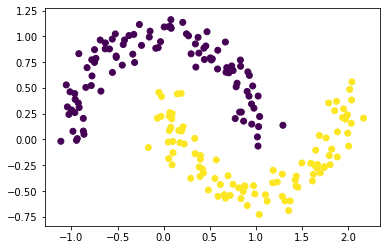

In [638]:
plt.scatter(X[:,0],X[:,1],c = pred)